In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url1 = "http://lfcstats.co.uk/jurgenklopp.html"
url2 = "http://lfcstats.co.uk/jurgenkloppepl.html"

In [3]:
def lfc_crawler_Klopp(url):
    header = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.80 Safari/537.36'
    }
    data = requests.get(url, headers = header).content
    soup = BeautifulSoup(data, 'html.parser')
    data_raw = soup.find("section", attrs={"id": "content"})
    items = data_raw.find_all("tr")
    df = pd.DataFrame(index=np.arange(len(items)), columns=['date','home', 'away', 'score', 'points'])
    for i in xrange(len(items[4:])):
        tmp = items[i+4].find_all('td')
        if len(tmp) > 4:
            a = tmp[1]
            b = tmp[2]
            c = tmp[3]
            d = tmp[4]
            if a and b and c and d:
                df.date[i] = a.getText()
                df.home[i] = b.getText() if c.getText() == 'A' else 'Liverpool'
                df.away[i] = b.getText() if c.getText() == 'H' else 'Liverpool'
                df.score[i] = d.getText()

    df = df[df.home.notnull()]
    a = df.score.str.split(' ')
    df.score = a.str.join('')
    for i in xrange(len(df)):
        tmp = df.score[i]
        if tmp[0] > tmp[2]:
            df.points[i] = 3
        elif tmp[0] == tmp[2]:
            df.points[i] = 1
        else:
            df.points[i] = 0

    return df

In [5]:
df_all_games = lfc_crawler_Klopp(url1)
df_pl = lfc_crawler_Klopp(url2)

In [6]:
df_pl.to_csv('klopp_pl_16_18.csv')
df_all_games.to_csv('klopp_all_16_18.csv')

In [7]:
df_all_games

,date,home,away,score,points
0,17.10.14,Tottenham H,Liverpool,0-0,1
1,22.10.15,Liverpool,Rubin Kazan,1-1,1
2,25.10.15,Liverpool,Southampton,1-1,1
3,28.10.15,Liverpool,Bournemouth,1-0,3
4,31.10.15,Chelsea,Liverpool,3-1,3
5,05.11.15,Rubin Kazan,Liverpool,1-0,3
6,08.11.15,Liverpool,Crystal Palace,1-2,0
7,21.11.15,Manchester City,Liverpool,4-1,3
8,26.11.15,Liverpool,Bordeaux,2-1,3
9,29.11.15,Liverpool,Swansea City,1-0,3


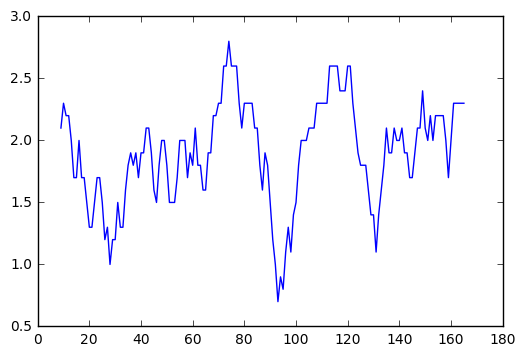

In [8]:
a = df_all_games.points.rolling(window=10).mean()
plt.plot(np.arange(len(df_all_games)), a)
plt.show()

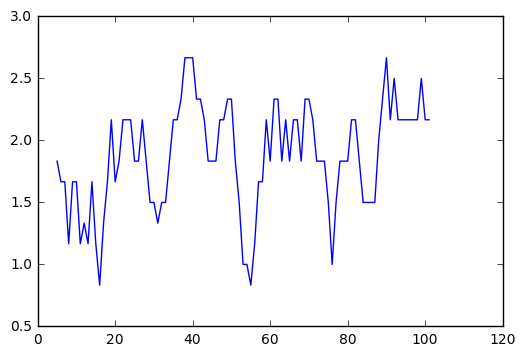

In [11]:
b = df_pl.points.rolling(window=6).mean()
plt.plot(np.arange(len(df_pl)), b)
plt.show()